
# Hands-On Session RUM2023 - Oxford
Manuel Behrendt - mabe@mpe.mpg.de \
Max-Planck-Institute for extraterrestrial Physics & University Observatory Munich

source: https://github.com/ManuelBehrendt/RUM2023

<img align="left" width="286" height="105" src="assets/repository_logo_small.jpg"> 











<div class="alert alert-block alert-info"> <b>NOTE</b> In this notebook, we learn some essential functions of MERA to process simulation data from RAMSES. In the associated folder, we provide a RAMSES output of a low-resolution galaxy simulation and a compressed version in the JLD2 format that allow you to work on a laptop. Ensure you can install and load the packages in the project environment (provided folder). </div>

## Installation

In [124]:
# Julia environment for reproducability
# The first time of execution, it installs all necessary packages
# Project environment for reproducability is automatically loaded
import Pkg; Pkg.activate(".") # to be on the safe side with environment
Pkg.instantiate() # install all necessary packages with necessary versions (first time)
Pkg.status() # list of installed packages

  Activating environment at `~/Documents/codes/github/RUM2023/Project.toml`


      Status `~/Documents/codes/github/RUM2023/Project.toml`
  [35d6a980] ColorSchemes v3.20.0
  [7073ff75] IJulia v1.24.0
  [a93385a2] JuliaDB v0.13.0
  [02f895e8] Mera v1.3.0
  [438e738f] PyCall v1.92.3 ⚲
  [d330b81b] PyPlot v2.11.1
  [2913bbd2] StatsBase v0.32.2
  [a759f4b9] TimerOutputs v0.5.22


### Load Packages

In [125]:
using Mera, PyPlot, ColorSchemes, StatsBase, JuliaDB, TimerOutputs

# prep plots
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

# prep timer
to = TimerOutput();

## Simulation Overview

**getinfo** function:
- overview of main simulation properties
- stored in an object that is passed to any function

In [126]:
# number of output, no path needed if executed in simulation folder
info = getinfo(300);

[Mera]: 2023-04-21T20:31:57.352

Code: RAMSES
output [300] summary:
mtime: 2023-04-09T05:34:09
ctime: 2023-04-09T12:38:39.283
simulation time: 445.89 [Myr]
boxlen: 48.0 [kpc]
ncpu: 640
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 10 --> cellsize(s): 750.0 [pc] - 46.88 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :pressure, :scalar_00, :scalar_01)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Nstars:   5.445150e+05 
particle-variables: 7  --> (:vx, :vy, :vz, :mass, :family, :tag, :birth)
particle-descriptor: (:position_x, :position_y, :position_z, :velocity_x, :velocity_y, :velocity_z, :mass, :identity, :levelp,

In [127]:
# search for help:

In [128]:
?getinfo

search: getinfo SegmentationFault getindex getinverse get_fignums getpositions



#### Get the simulation overview from RAMSES info, descriptor and output header files

```julia
getinfo(; output::Real=1, path::String="", namelist::String="", verbose::Bool=true)
return InfoType
```

#### Keyword Arguments

  * **`output`:** timestep number (default=1)
  * **`path`:** the path to the output folder relative to the current folder or absolute path
  * **`namelist`:** give the path to a namelist file (by default the namelist.txt-file in the output-folder is read)
  * **`verbose:`:** informations are printed on the screen by default

#### Examples

```julia
# read simulation information from output `1` in current folder
julia> info = getinfo()

# read simulation information from output `420` in given folder (relative path to the current working folder)
julia> info = getinfo(output=420, path="../MySimFolder/")

# or simply use
julia> info = getinfo(420, "../MySimFolder/")



# get an overview of the returned field-names
julia> propertynames(info)

# a more detailed overview
julia> viewfields(info)
...
julia> viewallfields(info)
...
julia> namelist(info)
...
julia> makefile(info)
...
julia> timerfile(info)
...
julia> patchfile(info)
...
```


In [129]:
# list the fields of object "info"
propertynames(info)

(:output, :path, :fnames, :simcode, :mtime, :ctime, :ncpu, :ndim, :levelmin, :levelmax, :boxlen, :time, :aexp, :H0, :omega_m, :omega_l, :omega_k, :omega_b, :unit_l, :unit_d, :unit_m, :unit_v, :unit_t, :gamma, :hydro, :nvarh, :nvarp, :nvarrt, :variable_list, :gravity_variable_list, :particles_variable_list, :rt_variable_list, :clumps_variable_list, :sinks_variable_list, :descriptor, :amr, :gravity, :particles, :rt, :clumps, :sinks, :namelist, :namelist_content, :headerfile, :makefile, :files_content, :timerfile, :compilationfile, :patchfile, :Narraysize, :scale, :grid_info, :part_info, :compilation, :constants)

In [130]:
# better representation
viewfields(info)

output	= 300
path	= /Users/mabe/Documents/codes/github/RUM2023/
fnames ==> subfields: (:output, :info, :amr, :hydro, :hydro_descriptor, :gravity, :particles, :part_descriptor, :rt, :rt_descriptor, :rt_descriptor_v0, :clumps, :timer, :header, :namelist, :compilation, :makefile, :patchfile)

simcode	= RAMSES
mtime	= 2023-04-09T05:34:09
ctime	= 2023-04-09T12:38:39.283
ncpu	= 640
ndim	= 3
levelmin	= 6
levelmax	= 10
boxlen	= 48.0
time	= 29.9031937665063
aexp	= 1.0
H0	= 1.0
omega_m	= 1.0
omega_l	= 0.0
omega_k	= 0.0
omega_b	= 0.045
unit_l	= 3.085677581282e21
unit_d	= 6.76838218451376e-23
unit_m	= 1.9885499720830952e42
unit_v	= 6.557528732282063e6
unit_t	= 4.70554946422349e14
gamma	= 1.6667
hydro	= true
nvarh	= 7
nvarp	= 7
nvarrt	= 0
variable_list	= [:rho, :vx, :vy, :vz, :p, :var6, :var7]
gravity_variable_list	= [:epot, :ax, :ay, :az]
particles_variable_list	= [:vx, :vy, :vz, :mass, :family, :tag, :birth]
rt_variable_list	= Symbol[]
clumps_variable_list	= Symbol[]
sinks_variable_list	= Symbol[

In [131]:
# access a single field:
info.gamma

1.6667

In [132]:
info.boxlen # code unit

48.0

In [133]:
namelist(info)


[Mera]: Namelist file content
&COOLING_PARAMS
cooling  	=.true. 
z_ave  	=1.

&SF_PARAMS
m_star   	= 1   
n_star   	= 10. !H/cc
T2_star  	= 0 !T/mu K
eps_star   	= 0.01 !1%

&AMR_PARAMS
levelmax  	=10
npartmax  	= 200000
ngridmax  	= 1000000 !1000000  
boxlen  	=48.0	!kpc
levelmin  	=6
nexpand  	=1                       !number of mesh expansions (mesh smoothing)

&BOUNDARY_PARAMS
jbound_min  	= 0, 0,-1,+1,-1,-1
kbound_max  	= 0, 0, 0, 0,-1,+1
no_inflow  	=.true.
bound_type  	= 2, 2, 2, 2, 2, 2    !2
nboundary   	= 6
ibound_max  	=-1,+1,+1,+1,+1,+1
ibound_min  	=-1,+1,-1,-1,-1,-1
jbound_max  	= 0, 0,-1,+1,+1,+1
kbound_min  	= 0, 0, 0, 0,-1,+1

&OUTPUT_PARAMS
tend  	=400                                
delta_tout  	=0.1                  !Time increment between outputs

&POISSON_PARAMS
gravity_type  	=-3                 !for 0 ->self gravitation ;  3 ->ext pot;  -3 ->ext. pot. + sg

&RUN_PARAMS
pic  	=.true.
nsubcycle  	=20*2
ncontrol  	=100                      !frequency of screen out

In [134]:
timerfile(info)


[Mera]: Timer-file content
 --------------------------------------------------------------------

     minimum       average       maximum  standard dev        std/av       %   rmn   rmx  TIMER
     426.559       428.960       431.540         1.216         0.003     0.5   562 606    coarse levels           
    2086.863      2285.294      2620.028       109.814         0.048     2.9   639   1    refine                  
     518.746       519.356       520.299         0.572         0.001     0.7   608  21    load balance            
     173.017       565.169      1799.729       385.862         0.683     0.7   602   1    particles               
    5897.562      5897.616      5897.791         0.018         0.000     7.5   244   1    io                      
    5176.808      9619.415     26606.857      5416.924         0.563    12.3   568   1    feedback                
   25022.898     25410.890     25585.446       143.363         0.006    32.4     1 602    poisson                 


#### Scales & Constants
precalculated/defined from unit_*

In [135]:
viewfields(info.scale)


[Mera]: Fields to scale from user/code units to selected units
Mpc	= 0.0010000000000006482
kpc	= 1.0000000000006481
pc	= 1000.0000000006482
mpc	= 1.0000000000006482e6
ly	= 3261.5637769461323
Au	= 2.0626480623310105e23
km	= 3.0856775812820004e16
m	= 3.085677581282e19
cm	= 3.085677581282e21
mm	= 3.085677581282e22
μm	= 3.085677581282e25
Mpc3	= 1.0000000000019446e-9
kpc3	= 1.0000000000019444
pc3	= 1.0000000000019448e9
mpc3	= 1.0000000000019446e18
ly3	= 3.469585750743794e10
Au3	= 8.775571306099254e69
km3	= 2.9379989454983075e49
m3	= 2.9379989454983063e58
cm3	= 2.9379989454983065e64
mm3	= 2.937998945498306e67
μm3	= 2.937998945498306e76
Msol_pc3	= 0.9997234790001649
Msun_pc3	= 0.9997234790001649
g_cm3	= 6.76838218451376e-23
Msol_pc2	= 999.7234790008131
Msun_pc2	= 999.7234790008131
g_cm2	= 0.20885045168302602
Gyr	= 0.014910986463557083
Myr	= 14.910986463557084
yr	= 1.4910986463557083e7
s	= 4.70554946422349e14
ms	= 4.70554946422349e17
Msol	= 9.99723479002109e8
Msun	= 9.99723479002109e8
Mearth	

In [136]:
# access directly (is used internally in all functions for scaling)
# (e.g. value provided in code units -> multiply by scale factor)
info.scale.Msun_pc2

999.7234790008131

In [137]:
viewfields(info.constants)


[Mera]: Constants given in cgs units
Au	= 0.01495978707
Mpc	= 3.08567758128e24
kpc	= 3.08567758128e21
pc	= 3.08567758128e18
mpc	= 3.08567758128e15
ly	= 9.4607304725808e17
Msol	= 1.9891e33
Msun	= 1.9891e33
Mearth	= 5.9722e27
Mjupiter	= 1.89813e30
Rsol	= 6.96e10
Rsun	= 6.96e10
me	= 9.1093897e-28
mp	= 1.6726231e-24
mn	= 1.6749286e-24
mH	= 1.66e-24
amu	= 1.6605402e-24
NA	= 6.0221367e23
c	= 2.99792458e10
G	= 6.67259e-8
kB	= 1.38062e-16
Gyr	= 3.15576e16
Myr	= 3.15576e13
yr	= 3.15576e7



In [138]:
info.constants.kB

1.38062e-16

In [139]:
# get physical time of simulation:
# internal calculation: info.time * info.scale.Myr
ti = gettime(info, :s)

1.4071095740655492e16

---

## Load Data

In [140]:
sv = storageoverview(info);

Overview of the used disc space for output: [300]
------------------------------------------------------
Folder:         5.68 GB 	<2.26 MB>/file
AMR-Files:      1.1 GB 	<1.75 MB>/file
Hydro-Files:    2.87 GB 	<4.58 MB>/file
Gravity-Files:  1.68 GB 	<2.69 MB>/file
Particle-Files: 38.56 MB 	<61.6 KB>/file


mtime: 2023-04-09T05:34:09
ctime: 2023-04-09T12:38:39.283


In [141]:
sv # Bytes

Dict{Any, Any} with 8 entries:
  :folder   => 6101105264
  :sink     => 0.0
  :particle => 40430034
  :hydro    => 3079240490
  :gravity  => 1802094080
  :amr      => 1177085816
  :clump    => 0.0
  :rt       => 0.0

### RAMSES Files

To load simulation data, use the following functions:
- gethydro
- getparticles
- getgravity
- getclumps
- ...

In [142]:
# loads the full box and all hydro quantities (leaf cells):
# Progressbar argument: show_progress=false/true
# If your RAM is too small reduce to, e.g, lmax=9
gas = gethydro(info);

[Mera]: Get hydro data: 2023-04-21T20:31:57.439

Key vars=(:level, :cx, :cy, :cz)
Using var(s)=(1, 2, 3, 4, 5, 6, 7) = (:rho, :vx, :vy, :vz, :p, :var6, :var7) 

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Reading data...


Progress: 100%|█████████████████████████████████████████| Time: 0:00:23


Memory used for data table :2.3210865957662463 GB
-------------------------------------------------------



In [143]:
mem = usedmemory(gas); # can be applied to any object

Memory used: 2.321 GB


In [144]:
propertynames(gas) # list fields

(:data, :info, :lmin, :lmax, :boxlen, :ranges, :selected_hydrovars, :used_descriptors, :smallr, :smallc, :scale)

In [145]:
viewfields(gas)


data ==> JuliaDB table: (:level, :cx, :cy, :cz, :rho, :vx, :vy, :vz, :p, :var6, :var7)

info ==> subfields: (:output, :path, :fnames, :simcode, :mtime, :ctime, :ncpu, :ndim, :levelmin, :levelmax, :boxlen, :time, :aexp, :H0, :omega_m, :omega_l, :omega_k, :omega_b, :unit_l, :unit_d, :unit_m, :unit_v, :unit_t, :gamma, :hydro, :nvarh, :nvarp, :nvarrt, :variable_list, :gravity_variable_list, :particles_variable_list, :rt_variable_list, :clumps_variable_list, :sinks_variable_list, :descriptor, :amr, :gravity, :particles, :rt, :clumps, :sinks, :namelist, :namelist_content, :headerfile, :makefile, :files_content, :timerfile, :compilationfile, :patchfile, :Narraysize, :scale, :grid_info, :part_info, :compilation, :constants)

lmin	= 6
lmax	= 10
boxlen	= 48.0
ranges	= [0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
selected_hydrovars	= [1, 2, 3, 4, 5, 6, 7]
smallr	= 0.0
smallc	= 0.0

scale ==> subfields: (:Mpc, :kpc, :pc, :mpc, :ly, :Au, :km, :m, :cm, :mm, :μm, :Mpc3, :kpc3, :pc3, :mpc3, :ly3, :Au3, :km3, :m3, 

In [146]:
# the hydro data is stored in a table:
gas.data

Table with 28320979 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

In [147]:
# select a few columns to get a table-view:
# every row corresponds to a cell
select(gas.data, (:level, :rho, :vx, :vy, :vz, :p))

Table with 28320979 rows, 6 columns:
level  rho          vx          vy         vz         p
────────────────────────────────────────────────────────────────
6      3.18647e-9   -1.25532    -1.2941    -1.25406   1.06027e-9
6      3.58591e-9   -1.23262    -1.2677    -1.15465   1.33677e-9
6      3.906e-9     -1.2075     -1.24194   -1.10506   1.58181e-9
6      4.27441e-9   -1.16462    -1.19806   -1.06711   1.93168e-9
6      4.61042e-9   -1.10493    -1.1418    -1.02841   2.37842e-9
6      4.83977e-9   -1.02686    -1.07472   -0.974529  2.8197e-9
6      4.974e-9     -0.948004   -1.0109    -0.90304   3.20883e-9
6      5.08112e-9   -0.879731   -0.960085  -0.825048  3.56075e-9
6      5.20596e-9   -0.824484   -0.924039  -0.741562  3.89183e-9
6      5.38372e-9   -0.782768   -0.901728  -0.655418  4.20451e-9
6      5.67209e-9   -0.754141   -0.891348  -0.569161  4.50256e-9
6      6.14423e-9   -0.737723   -0.88947   -0.485604  4.78595e-9
⋮
10     0.000321702  0.268398    3.15405    0.0687598  2.18179

In [148]:
?gethydro

search: gethydro



#### Read the leaf-cells of the hydro-data:

  * select variables
  * limit to a maximum level
  * limit to a spatial range
  * set a minimum density or sound speed
  * check for negative values in density and thermal pressure
  * print the name of each data-file before reading it
  * toggle verbose mode
  * toggle progress bar
  * pass a struct with arguments (myargs)

```julia
gethydro(   dataobject::InfoType;
            lmax::Real=dataobject.levelmax,
            vars::Array{Symbol,1}=[:all],
            xrange::Array{<:Any,1}=[missing, missing],
            yrange::Array{<:Any,1}=[missing, missing],
            zrange::Array{<:Any,1}=[missing, missing],
            center::Array{<:Any,1}=[0., 0., 0.],
            range_unit::Symbol=:standard,
            smallr::Real=0.,
            smallc::Real=0.,
            check_negvalues::Bool=false,
            print_filenames::Bool=false,
            verbose::Bool=true,
            show_progress::Bool=true,
            myargs::ArgumentsType=ArgumentsType()  )
```

#### Returns an object of type HydroDataType, containing the hydro-data table, the selected options and the simulation ScaleType and summary of the InfoType

```julia
return HydroDataType()

# get an overview of the returned fields:
# e.g.:
julia> info = getinfo(100)
julia> gas  = gethydro(info)
julia> viewfields(gas)
#or:
julia> fieldnames(gas)
```

#### Arguments

##### Required:

  * **`dataobject`:** needs to be of type: "InfoType", created by the function *getinfo*

##### Predefined/Optional Keywords:

  * **`lmax`:** the maximum level to be read from the data
  * **`var(s)`:** the selected hydro variables in arbitrary order: :all (default), :cpu, :rho, :vx, :vy, :vz, :p, :var6, :var7...
  * **`xrange`:** the range between [xmin, xmax] in units given by argument `range_unit` and relative to the given `center`; zero length for xmin=xmax=0. is converted to maximum possible length
  * **`yrange`:** the range between [ymin, ymax] in units given by argument `range_unit` and relative to the given `center`; zero length for ymin=ymax=0. is converted to maximum possible length
  * **`zrange`:** the range between [zmin, zmax] in units given by argument `range_unit` and relative to the given `center`; zero length for zmin=zmax=0. is converted to maximum possible length
  * **`range_unit`:** the units of the given ranges: :standard (code units), :Mpc, :kpc, :pc, :mpc, :ly, :au , :km, :cm (of typye Symbol) ..etc. ; see for defined length-scales viewfields(info.scale)
  * **`center`:** in units given by argument `range_unit`; by default [0., 0., 0.]; the box-center can be selected by e.g. [:bc], [:boxcenter], [value, :bc, :bc], etc..
  * **`smallr`:** set lower limit for density; zero means inactive
  * **`smallc`:** set lower limit for thermal pressure; zero means inactive
  * **`check_negvalues`:** check loaded data of "rho" and "p" on negative values; false by default
  * **`print_filenames`:** print on screen the current processed hydro file of each CPU
  * **`verbose`:** print timestamp, selected vars and ranges on screen; default: true
  * **`show_progress`:** print progress bar on screen
  * **`myargs`:** pass a struct of ArgumentsType to pass several arguments at once and to overwrite default values of lmax, xrange, yrange, zrange, center, range*unit, verbose, show*progress

### Defined Methods - function defined for different arguments

  * gethydro( dataobject::InfoType; ...) # no given variables -> all variables loaded
  * gethydro( dataobject::InfoType, var::Symbol; ...) # one given variable -> no array needed
  * gethydro( dataobject::InfoType, vars::Array{Symbol,1}; ...)  # several given variables -> array needed

#### Examples

```julia
# read simulation information
julia> info = getinfo(420)

# Example 1:
# read hydro data of all variables, full-box, all levels
julia> gas = gethydro(info)

# Example 2:
# read hydro data of all variables up to level 8
# data range 20x20x4 kpc; ranges are given in kpc relative to the box (here: 48 kpc) center at 24 kpc
julia> gas = gethydro(    info,
                          lmax=8,
                          xrange=[-10.,10.],
                          yrange=[-10.,10.],
                          zrange=[-2.,2.],
                          center=[24., 24., 24.],
                          range_unit=:kpc )

# Example 3:
# give the center of the box by simply passing: center = [:bc] or center = [:boxcenter]
# this is equivalent to center=[24.,24.,24.] in Example 2
# the following combination is also possible: e.g. center=[:bc, 12., 34.], etc.
julia> gas = gethydro(    info,
                          lmax=8,
                          xrange=[-10.,10.],
                          yrange=[-10.,10.],
                          zrange=[-2.,2.],
                          center=[33., bc:, 10.],
                          range_unit=:kpc )

# Example 4:
# read hydro data of the variables density and the thermal pressure, full-box, all levels
julia> gas = gethydro( info, [:rho, :p] ) # use array for the variables

# Example 5:
# read hydro data of the single variable density, full-box, all levels
julia> gas = gethydro( info, :rho ) # no array for a single variable needed
...
```


In [149]:
# loads the full box
# in this case only stellar particles (no dm particles availabe)
part = getparticles(info);

[Mera]: Get particle data: 2023-04-21T20:32:29.502

Key vars=(:level, :x, :y, :z, :id, :family, :tag)
Using var(s)=(1, 2, 3, 4, 7) = (:vx, :vy, :vz, :mass, :birth) 

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Found 5.445150e+05 particles
Memory used for data table :38.42913246154785 MB
-------------------------------------------------------



In [150]:
# to compare loading time with MERA-files
@timeit to "RAMSES" begin
    @timeit to "hydro"     gas = gethydro(info, verbose=false)
    @timeit to "particles" part = getparticles(info, verbose=false)
end;
to

Reading data...


Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


 ────────────────────────────────────────────────────────────────────────
                                Time                    Allocations      
                       ───────────────────────   ────────────────────────
   Tot / % measured:        64.6s /  49.3%           38.0GiB /  48.3%    

 Section       ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────────
 RAMSES             1    31.8s  100.0%   31.8s   18.4GiB  100.0%  18.4GiB
   hydro            1    31.1s   97.9%   31.1s   18.1GiB   98.4%  18.1GiB
   particles        1    676ms    2.1%   676ms    304MiB    1.6%   304MiB
 ────────────────────────────────────────────────────────────────────────

### JLD2-Files (MERA-Files)

The previous RAMSES output is converted to a compressed JLD2 file **output_00300.jld2** for efficient data loading and to save disk space. The amount of data is the same; only the content of a few cells is modified; see later for a surprise.

In [151]:
# Get an overview of the stored data in the MERA file
# (AMR structure is associated with all datatypes)
viewdata(300);

[Mera]: 2023-04-21T20:33:01.910

Mera-file output_00300.jld2 contains:

Datatype: particles
merafile_version: 1.0
Compression: CodecLz4.LZ4FrameCompressor(Base.RefValue{Ptr{CodecLz4.LZ4F_cctx}}(Ptr{CodecLz4.LZ4F_cctx} @0x0000000000000000), Base.RefValue{CodecLz4.LZ4F_preferences_t}(CodecLz4.LZ4F_preferences_t(CodecLz4.LZ4F_frameInfo_t(0x00000000, 0x00000000, 0x00000000, 0x00000000, 0x0000000000000000, 0x00000000, 0x00000000), 0, 0x00000000, (0x00000000, 0x00000000, 0x00000000, 0x00000000))), TranscodingStreams.Memory(Ptr{UInt8} @0x0000000000000000, 0x0000000000000013), false)
CodecZlib: VersionNumber[v"0.6.0"]
merafile_version: 1.0
JLD2: VersionNumber[v"0.4.31"]
CodecBzip2: VersionNumber[v"0.7.2"]
JLD2compatible_versions: 0.1
CodecLz4: VersionNumber[v"0.4.0"]
Mera: Any[v"1.2.0", "https://github.com/ManuelBehrendt/Mera.jl"]
-------------------------
Memory: 38.45080280303955 MB (uncompressed)


Datatype: gravity
merafile_version: 1.0
Compression: CodecLz4.LZ4FrameCompressor(Base.RefValu

In [152]:
# similarly to getinfo function
info = infodata(300);

[Mera]: 2023-04-21T20:33:01.992

Use datatype: hydro
Code: RAMSES
output [300] summary:
mtime: 2023-04-09T05:34:09
ctime: 2023-04-09T12:38:39.283
simulation time: 445.89 [Myr]
boxlen: 48.0 [kpc]
ncpu: 640
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 10 --> cellsize(s): 750.0 [pc] - 46.88 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :pressure, :scalar_00, :scalar_01)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Nstars:   5.445150e+05 
particle-variables: 7  --> (:vx, :vy, :vz, :mass, :family, :tag, :birth)
particle-descriptor: (:position_x, :position_y, :position_z, :velocity_x, :velocity_y, :velocity_z, :mass,

In [153]:
@timeit to "MERA" begin
    @timeit to "hydro"     gas = loaddata(300, :hydro)
    @timeit to "particles" part= loaddata(300, :particles)
end;
to

[Mera]: 2023-04-21T20:33:02.006

Open Mera-file output_00300.jld2:

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Memory used for data table :2.321107229217887 GB
-------------------------------------------------------

[Mera]: 2023-04-21T20:33:06.379

Open Mera-file output_00300.jld2:

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Memory used for data table :38.450284004211426 MB
-------------------------------------------------------



 ────────────────────────────────────────────────────────────────────────
                                Time                    Allocations      
                       ───────────────────────   ────────────────────────
   Tot / % measured:        69.2s /  52.5%           45.1GiB /  56.4%    

 Section       ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────────
 RAMSES             1    31.8s   87.5%   31.8s   18.4GiB   72.1%  18.4GiB
   hydro            1    31.1s   85.6%   31.1s   18.1GiB   71.0%  18.1GiB
   particles        1    676ms    1.9%   676ms    304MiB    1.2%   304MiB
 MERA               1    4.55s   12.5%   4.55s   7.10GiB   27.9%  7.10GiB
   hydro            1    4.37s   12.0%   4.37s   6.98GiB   27.4%  6.98GiB
   particles        1    176ms    0.5%   176ms    121MiB    0.5%   121MiB
 ────────────────────────────────────────────────────────────────────────

In [154]:
# how much faster is the reading of MERA/JLD2 files for you?

## Projection

In [155]:
# default cell size == max resolution
# full box is taken into account
pg  = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], verbose=false);
pgx = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], direction=:x, verbose=false);
pgy = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], direction=:y, verbose=false);
bell() # notification sound

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


In [156]:
propertynames(pg)

(:maps, :maps_unit, :maps_lmax, :maps_weight, :maps_mode, :lmax_projected, :lmin, :lmax, :ranges, :extent, :cextent, :ratio, :effres, :pixsize, :boxlen, :smallr, :smallc, :scale, :info)

In [157]:
pg.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 1 entry:
  :sd => [4.27587e-7 4.27587e-7 … 4.27587e-7 4.27587e-7; 4.27587e-7 4.27587e-7 …

In [158]:
pg.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 1 entry:
  :sd => :Msun_pc2

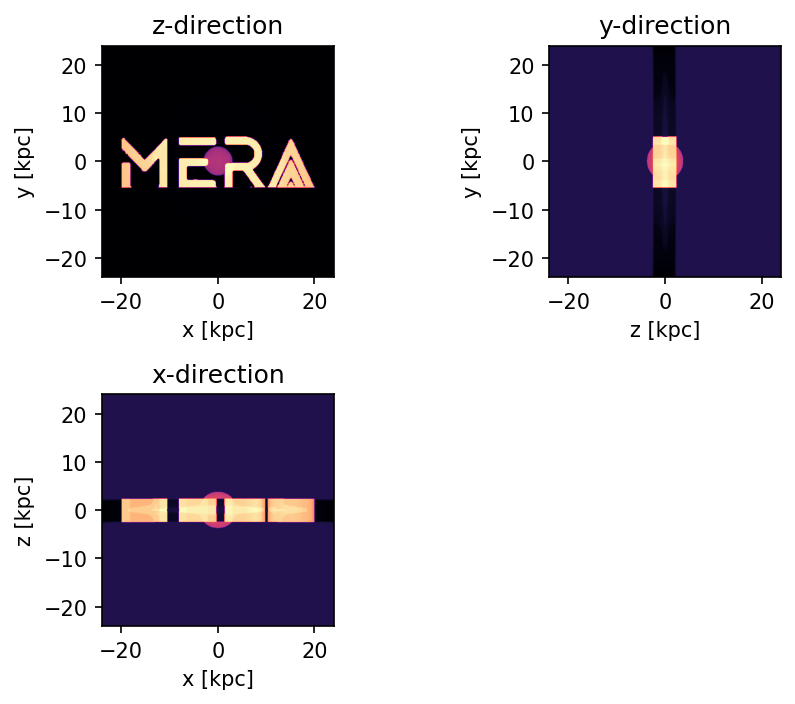

In [159]:
subplot(2,2,1)
    title("z-direction")
    imshow(log10.(pg.maps[:sd])' , origin="lower", extent=pg.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(2,2,2)
    title("y-direction")
    imshow(log10.(pgx.maps[:sd]) , origin="lower", extent=pgx.cextent, cmap="magma")
    #colorbar()
    xlabel("z [kpc]")
    ylabel("y [kpc]")

subplot(2,2,3)
    title("x-direction")
    imshow(log10.(pgy.maps[:sd])' , origin="lower", extent=pgy.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("z [kpc]")

tight_layout()


[Mera]: 2023-04-21T20:33:20.736

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 32^2
Map size: 32 x 32
Pixel size: 1.5 [kpc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


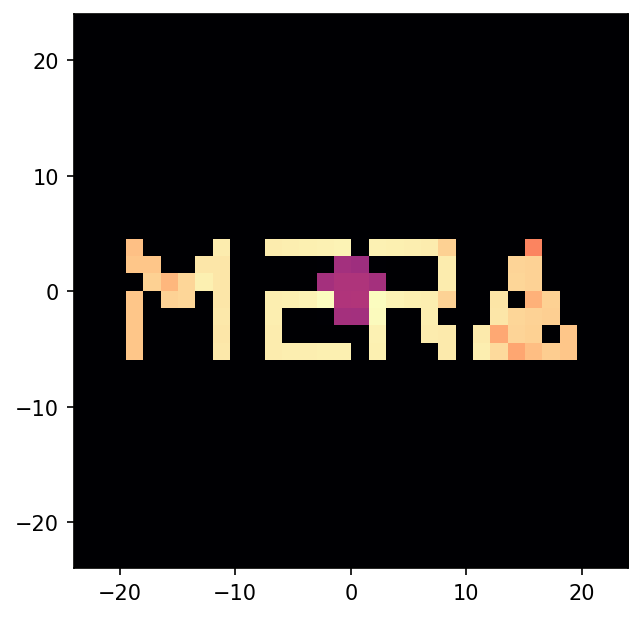

PyObject <matplotlib.image.AxesImage object at 0x17628be20>

In [160]:
# project for different resolutions
# here, lmax is not limited to the maximum resolution of the simulation.
# lmax
pg  = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], lmax=5);
imshow(log10.(pg.maps[:sd]'), origin="lower", extent=pg.cextent, cmap="magma")


[Mera]: 2023-04-21T20:33:24.364

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 100^2
Map size: 100 x 100
Pixel size: 480.0 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


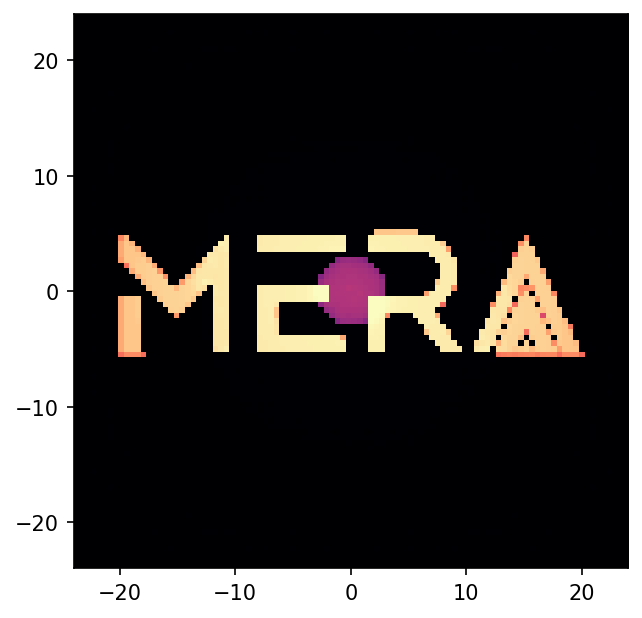

PyObject <matplotlib.image.AxesImage object at 0x1762c9ae0>

In [161]:
# effective resolution (related to the boxsize)
pg  = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], res=100);
imshow(log10.(pg.maps[:sd]'), origin="lower", extent=pg.cextent, cmap="magma")


[Mera]: 2023-04-21T20:33:28.004

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 481^2
Map size: 481 x 481
Pixel size: 99.792 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


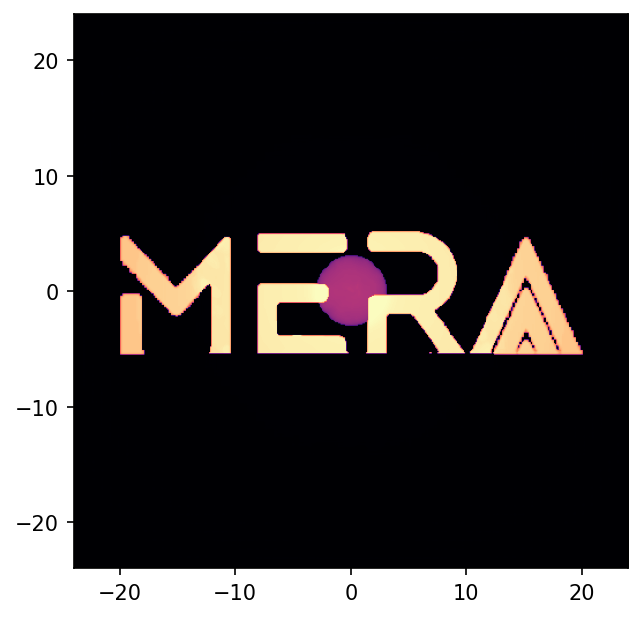

PyObject <matplotlib.image.AxesImage object at 0x1763657b0>

In [162]:
# pixel-size (related to a physicel size)
pg  = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], pxsize=[100., :pc]);
imshow(log10.(pg.maps[:sd]'), origin="lower", extent=pg.cextent, cmap="magma")


## Subregions

In [163]:
msum(gas, :Msun) # gas mass of the full box

2.5130398492054675e11

In [164]:
# cutout the letter "M"
gas_M = subregion(gas, :cuboid, 
                xrange=[-20,-10],
                yrange=[-5,5],
                zrange=[-2,2],
                center=[:boxcenter],
                range_unit=:kpc);

[Mera]: 2023-04-21T20:33:31.962

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0833333 :: 0.2916667  	==> 4.0 [kpc] :: 14.0 [kpc]
ymin::ymax: 0.3958333 :: 0.6041667  	==> 19.0 [kpc] :: 29.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :40.659953117370605 MB
-------------------------------------------------------



In [165]:
pg_M  = projection(gas_M, :sd, :Msun_pc2, center=[:boxcenter], verbose=false);
pgx_M = projection(gas_M, :sd, :Msun_pc2, center=[:boxcenter], direction=:x, verbose=false);
pgy_M = projection(gas_M, :sd, :Msun_pc2, center=[:boxcenter], direction=:y, verbose=false);

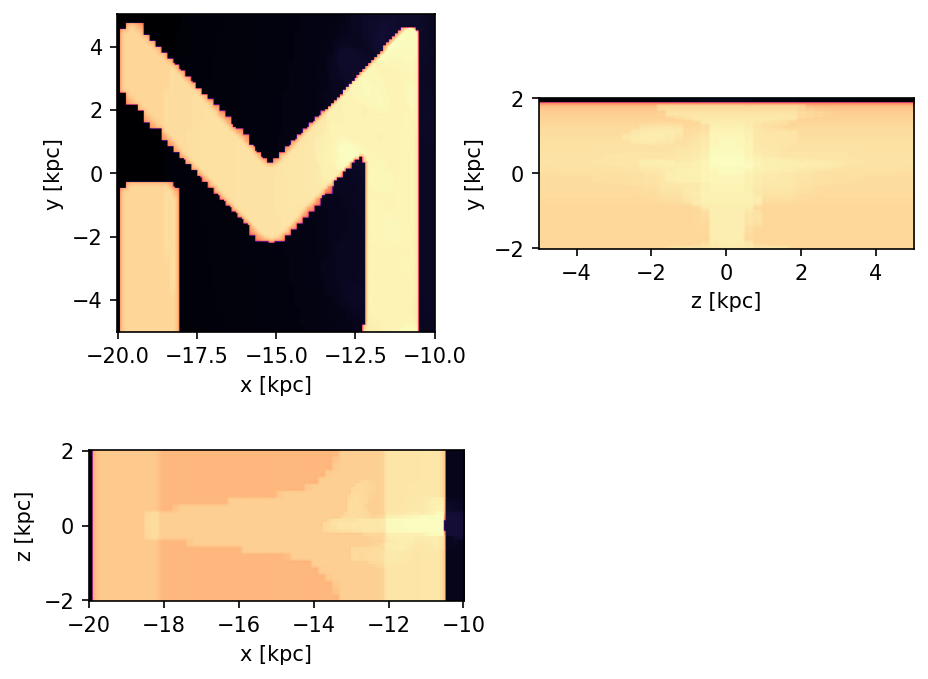

In [166]:
subplot(2,2,1)
    imshow(log10.(pg_M.maps[:sd])' , origin="lower", extent=pg_M.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(2,2,2)
    imshow(log10.(pgx_M.maps[:sd]) , origin="lower", extent=pgx_M.cextent, cmap="magma")
    #colorbar()
    xlabel("z [kpc]")
    ylabel("y [kpc]")

subplot(2,2,3)
    imshow(log10.(pgy_M.maps[:sd])' , origin="lower", extent=pgy_M.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("z [kpc]")

tight_layout()


In [167]:
msum(gas_M, :Msun) # gas mass of the "M" region

3.606244915276506e10

In [168]:
# define a struct for multiple arguments to pass it to a function at once:
myargs_M = ArgumentsType()

ArgumentsType(missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing)

In [169]:
viewfields(myargs_M)


[Mera]: Fields to use as arguments in functions
pxsize	= missing
res	= missing
lmax	= missing
xrange	= missing
yrange	= missing
zrange	= missing
radius	= missing
height	= missing
direction	= missing
plane	= missing
plane_ranges	= missing
thickness	= missing
position	= missing
center	= missing
range_unit	= missing
data_center	= missing
data_center_unit	= missing
verbose	= missing
show_progress	= missing



In [170]:
myargs_M.xrange=[-20,-10]
myargs_M.yrange=[-5,5]
myargs_M.zrange=[-2,2]
myargs_M.center=[:boxcenter]
myargs_M.range_unit=:kpc

myargs_E = deepcopy(myargs_M)
myargs_E.xrange=[-10,0]

myargs_R = deepcopy(myargs_M)
myargs_R.xrange=[0,10]

myargs_A = deepcopy(myargs_M)
myargs_A.xrange=[10,20];

In [171]:
# verbose(false) # main switch
# check state with call: verbose()

# with myargs the function is better readable
gas_E = subregion(gas, :cuboid, myargs=myargs_E);
gas_R = subregion(gas, :cuboid, myargs=myargs_R);
gas_A = subregion(gas, :cuboid, myargs=myargs_A);


part_M = subregion(part, :cuboid, myargs=myargs_M);
part_E = subregion(part, :cuboid, myargs=myargs_E);
part_R = subregion(part, :cuboid, myargs=myargs_R);
part_A = subregion(part, :cuboid, myargs=myargs_A);

[Mera]: 2023-04-21T20:33:33.729

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.5  	==> 14.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.3958333 :: 0.6041667  	==> 19.0 [kpc] :: 29.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :180.6563367843628 MB
-------------------------------------------------------

[Mera]: 2023-04-21T20:33:35.288

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.5 :: 0.7083333  	==> 24.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.3958333 :: 0.6041667  	==> 19.0 [kpc] :: 29.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :182.11223888397217 MB
-------------------------------------------------------

[Mera]: 2023-04-21T20:33:36.860

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.7083333 :: 0.9166667  	==> 34.0 [kpc] :: 44.0 [kpc]
ym

In [172]:
myargs_M.verbose=false
myargs_E.verbose=false
myargs_R.verbose=false
myargs_A.verbose=false

pg_M = projection(gas_M, [:sd,:T], [:Msun_pc2, :K], center=[:boxcenter], myargs=myargs_M);
pg_E = projection(gas_E, [:sd,:T], [:Msun_pc2, :K], center=[:boxcenter], myargs=myargs_E);
pg_R = projection(gas_R, [:sd,:T], [:Msun_pc2, :K], center=[:boxcenter], myargs=myargs_R);
pg_A = projection(gas_A, [:sd,:T], [:Msun_pc2, :K], center=[:boxcenter], myargs=myargs_A);


pp_M = projection(part_M, :sd, :Msun_pc2, center=[:boxcenter], myargs=myargs_M);
pp_E = projection(part_E, :sd, :Msun_pc2, center=[:boxcenter], myargs=myargs_E);
pp_R = projection(part_R, :sd, :Msun_pc2, center=[:boxcenter], myargs=myargs_R);
pp_A = projection(part_A, :sd, :Msun_pc2, center=[:boxcenter], myargs=myargs_A);

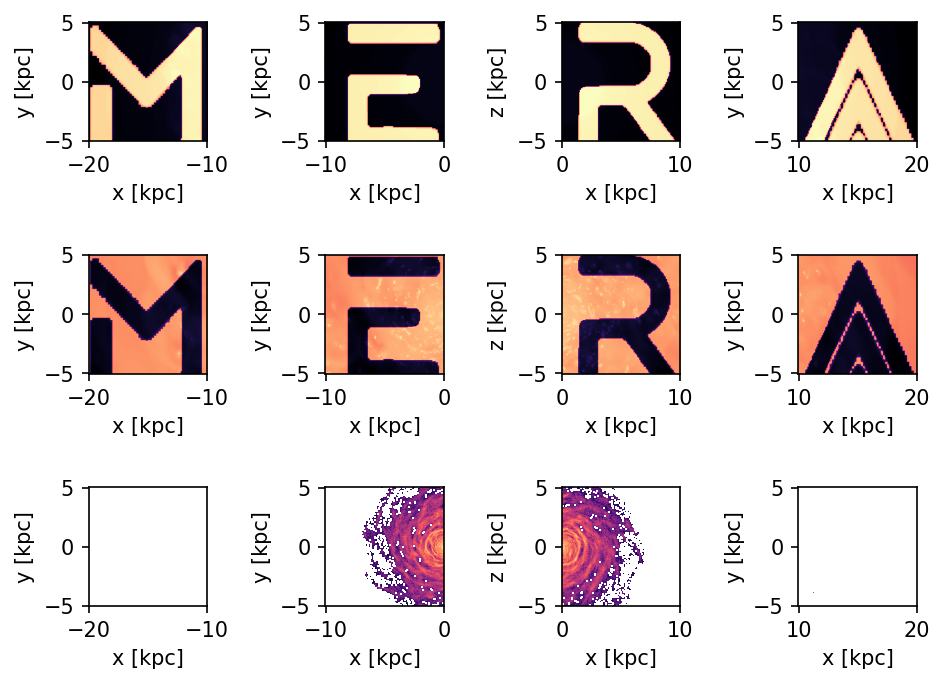

In [173]:
subplot(3,4,1)
    imshow(log10.(pg_M.maps[:sd])' , origin="lower", extent=pg_M.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(3,4,2)
    imshow(log10.(pg_E.maps[:sd])' , origin="lower", extent=pg_E.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(3,4,3)
    imshow(log10.(pg_R.maps[:sd])' , origin="lower", extent=pg_R.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("z [kpc]")

subplot(3,4,4)
    imshow(log10.(pg_A.maps[:sd])' , origin="lower", extent=pg_A.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")



subplot(3,4,5)
    imshow( log10.(pg_M.maps[:T])' , origin="lower", extent=pg_M.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(3,4,6)
    imshow( log10.(pg_E.maps[:T])' , origin="lower", extent=pg_E.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(3,4,7)
    imshow( log10.(pg_R.maps[:T])' , origin="lower", extent=pg_R.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("z [kpc]")

subplot(3,4,8)
    imshow( log10.(pg_A.maps[:T])' , origin="lower", extent=pg_A.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")


subplot(3,4,9)
    imshow( log10.(pp_M.maps[:sd])' , origin="lower", extent=pp_M.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(3,4,10)
    imshow( log10.(pp_E.maps[:sd])' , origin="lower", extent=pp_E.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

subplot(3,4,11)
    imshow( log10.(pp_R.maps[:sd])' , origin="lower", extent=pp_R.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("z [kpc]")

subplot(3,4,12)
    imshow( log10.(pp_A.maps[:sd])' , origin="lower", extent=pp_A.cextent, cmap="magma")
    #colorbar()
    xlabel("x [kpc]")
    ylabel("y [kpc]")

tight_layout()


In [174]:
# calculate gas and particle mass within the regions
massg_M = msum(gas_M, :Msun)
massg_E = msum(gas_E, :Msun)
massg_R = msum(gas_R, :Msun)
massg_A = msum(gas_A, :Msun);

massp_M = msum(part_M, :Msun)
massp_E = msum(part_E, :Msun)
massp_R = msum(part_R, :Msun)
massp_A = msum(part_A, :Msun);


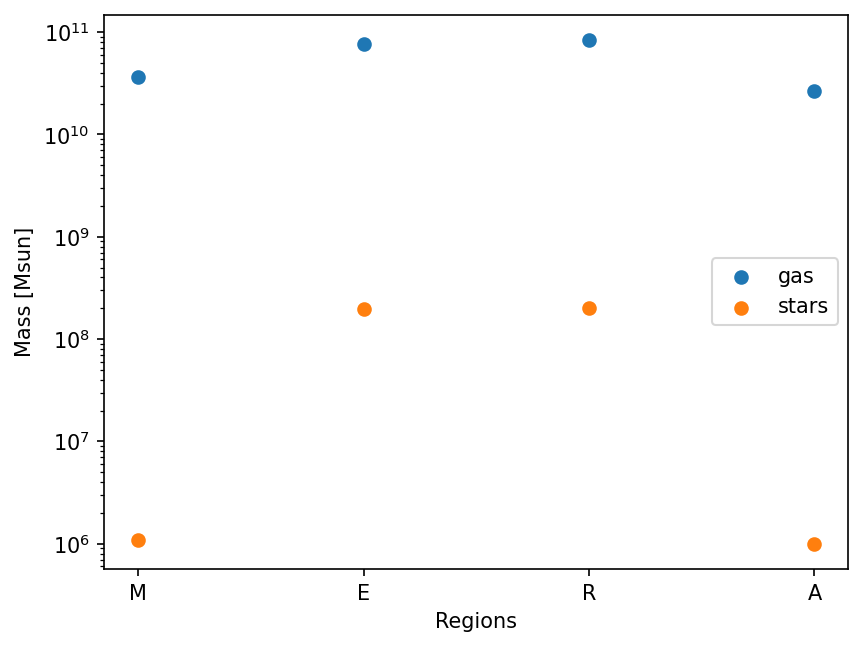

In [175]:
scatter(["M","E","R","A"], [massg_M, massg_E, massg_R, massg_A], label="gas")
scatter(["M","E","R","A"], [massp_M, massp_E, massp_R, massp_A], label="stars")
yscale("log")
xlabel("Regions")
ylabel("Mass [Msun]")
legend();

## Galaxy Density pdf

In [176]:
# read the unmodified galaxy data
info = getinfo(300,  verbose=false);
gas = gethydro(info, verbose=false,
        xrange=[-8,8], 
        yrange=[-8,8], 
        zrange=[-2,2], 
        center=[:boxcenter], 
        range_unit=:kpc);

Reading data...


Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


In [177]:
pg = projection(gas, :sd, :Msun_pc2, center=[:boxcenter], verbose=false);
sdmap = pg.maps[:sd];

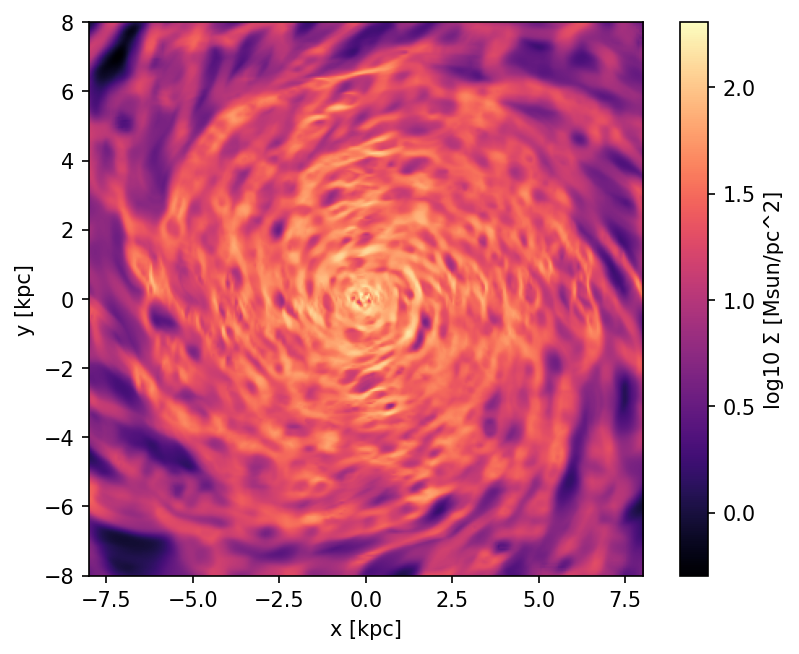

In [178]:
# preview the surface density projection of the galaxy
imshow(log10.(sdmap)', origin="lower", extent=pg.cextent, cmap="magma")
colorbar(label="log10 Σ [Msun/pc^2]")
xlabel("x [kpc]")
ylabel("y [kpc]");

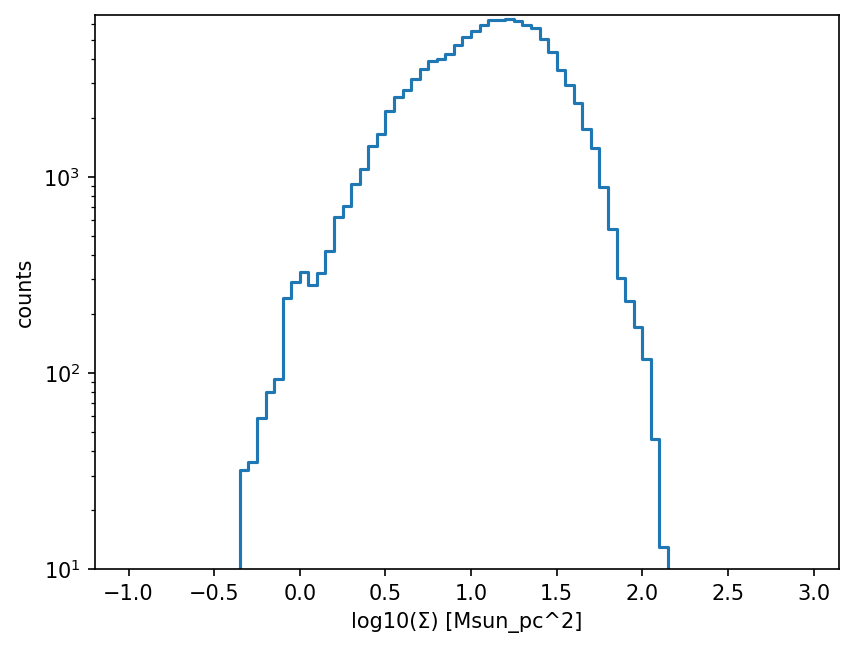

PyObject Text(35.0, 0.5, 'counts')

In [179]:

hrange = -1:0.05:3
h = fit(Histogram, log10.(sdmap[:]), hrange)
pdf = h.weights
sd = hrange[1:end-1]

step( sd,  h.weights)
ylim(10,)
yscale("log")
xlabel("log10(Σ) [Msun_pc^2]")
ylabel("counts")


## Profiles
Will be soon wrapped into a single function:

In [180]:
# prepare data:
# =============

# surface density
pg = projection(gas, [:sd, :r_cylinder], [:Msun_pc2, :kpc], center=[:boxcenter], verbose=false);
sdmap = pg.maps[:sd]
rmap = pg.maps[:r_cylinder]

# rotation curve
vrot = getvar(gas, :vϕ_cylinder, :km_s, center=[:boxcenter])
r_vrot = getvar(gas, :r_cylinder, :kpc, center=[:boxcenter])
mass = getvar(gas, :mass, center=[:boxcenter]); # mass in each cell in code unit, used for the weighting

In [181]:
# create radial surfacedensity profile
rrange = 0:0.125:10 # binning [kpc]

hsd  = fit(Histogram, rmap[:], weights(sdmap[:]),  rrange )
nhsd = fit(Histogram, rmap[:], rrange )
Σprofile = hsd.weights ./ nhsd.weights # get average
Σradius = rrange[1:end-1];

In [182]:
# create radial vrot profile
rrange = 0:0.125:10 # binning [kpc]

hvrot = fit(Histogram, r_vrot, weights(vrot .* mass),  rrange )
hmass = fit(Histogram, r_vrot, weights( mass),  rrange )
vrot_profile = hvrot.weights ./ hmass.weights # get mass-weighted average
vrot_radius = rrange[1:end-1];

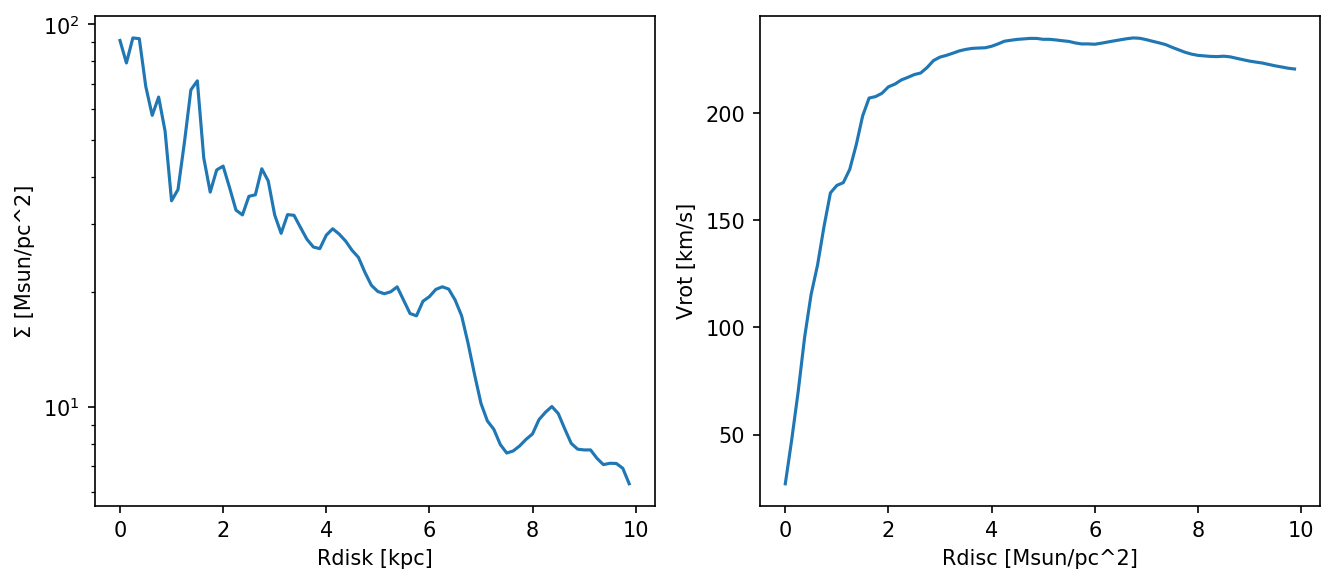

In [183]:
figure(figsize=(9,4))
subplot(1,2,1)
    plot(Σradius, Σprofile)
    yscale("log")
    xlabel("Rdisk [kpc]")
    ylabel("Σ [Msun/pc^2]")

subplot(1,2,2)
    plot(vrot_radius, vrot_profile)
    xlabel("Rdisc [Msun/pc^2]")
    ylabel("Vrot [km/s]")

tight_layout()


## Getvar
Get/extract quantities from the data table or derive them:

In [184]:
getvar()

Predefined vars that can be calculated for each cell/particle:
----------------------------------------------------------------
=============================[gas]:=============================
       -all the non derived hydro vars-
:cpu, :level, :rho, :cx, :cy, :cz, :vx, :vy, :vz, :p, var6,...

              -derived hydro vars-
:x, :y, :z
:mass, :cellsize, :volume, :freefall_time
:cs, :mach, :jeanslength, :jeansnumber
:T, :Temp, :Temperature with p/rho

:h, :hx, :hy, :hz (specific angular momentum)

==========================[particles]:==========================
       -all the non derived particle vars-
:cpu, :level, :id, :family, :tag 
:x, :y, :z, :vx, :vy, :vz, :mass, :birth, :metal....

              -derived particle vars-
:age

===========================[gravity]:===========================
       -all the non derived gravity vars-
:cpu, :level, cx, cy, cz, :epot, :ax, :ay, :az

              -derived gravity vars-
:x, :y, :z
:cellsize, :volume

===========================[cl

## Phase Diagram

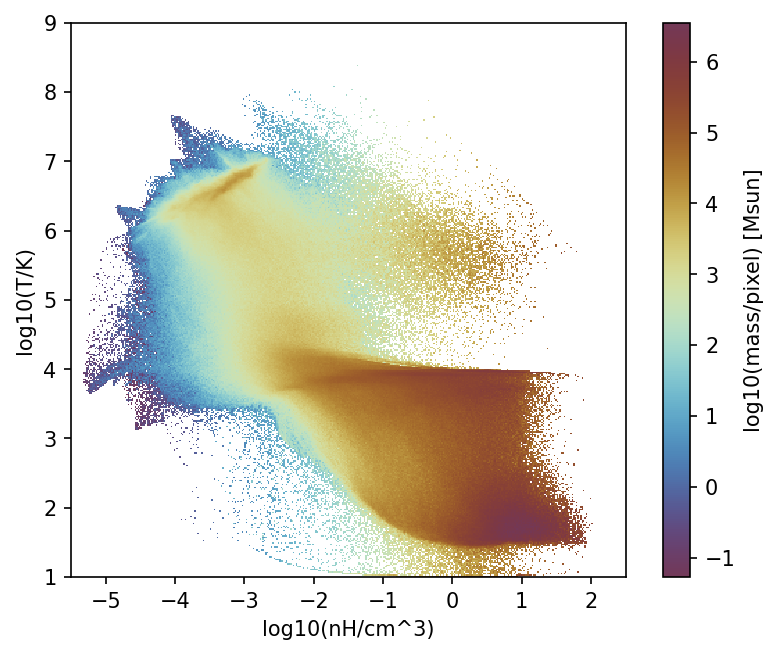

In [185]:
cmap2 = ColorMap(reverse((ColorSchemes.romaO.colors)))

Temperature = getvar(gas, :T, :K)
nH = getvar(gas, :rho, :nH)
mass = getvar(gas, :mass, :Msun)

Trange = 1:0.02:9
nHrange = -5.5:0.02:2.5

# 2d histogram
hsd = fit(Histogram, (log10.(nH), log10.(Temperature)), weights(mass),  (nHrange, Trange) );
extent = [minimum(hsd.edges[1]), maximum(hsd.edges[1]), minimum(hsd.edges[2]), maximum(hsd.edges[2])];

imshow(log10.(hsd.weights)', origin="lower", interpolation="none", cmap=cmap2, extent=extent)
colorbar(label="log10(mass/pixel) [Msun]")
xlabel("log10(nH/cm^3)")
ylabel("log10(T/K)");


## Masking

In [186]:
# select denser/cold gas
mask_density = getvar(gas, :rho, :nH) .> 5 # cm-3
mask_Temp    = getvar(gas, :T, :K) .< 5e2 # K
mask_tot = mask_density .* mask_Temp;

In [187]:
msum(gas, :Msun, mask=mask_tot) # total mass of the masked/selected region

2.318008637371975e9

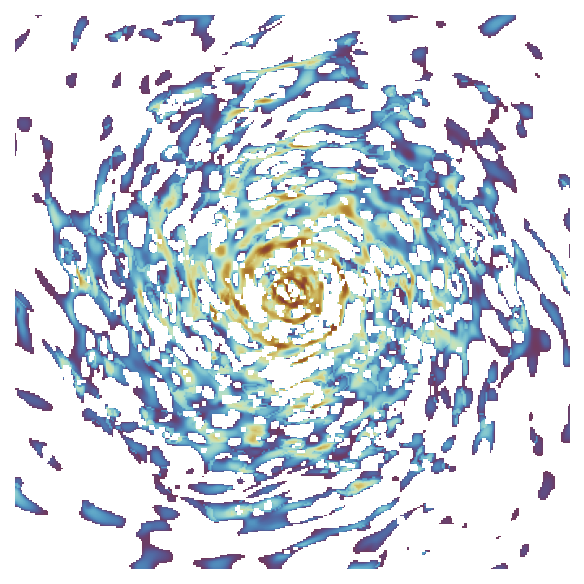

(-0.5, 341.5, -0.5, 341.5)

In [188]:
# project the selected region
psd_cold = projection(gas, :sd, :Msun_pc2, mask=mask_tot, verbose=false);
imshow(log10.(psd_cold.maps[:sd])', origin="lower", cmap=cmap2 )
axis("off")


In [189]:
# hotter/thinner gas
# load data only one time
nH = getvar(gas, :rho, :nH)  
Temp = getvar(gas, :T, :K) 

# prep masked regions
mask_density_h = nH .< 10.
mask_density_l = nH .> 1e-2

mask_Temp_h    =  Temp .< 1e5 # K
mask_Temp_l    =  Temp .> 1e4 # K

# combine all masks
mask_tot = mask_density_h .* mask_density_l .* mask_Temp_h .* mask_Temp_l;

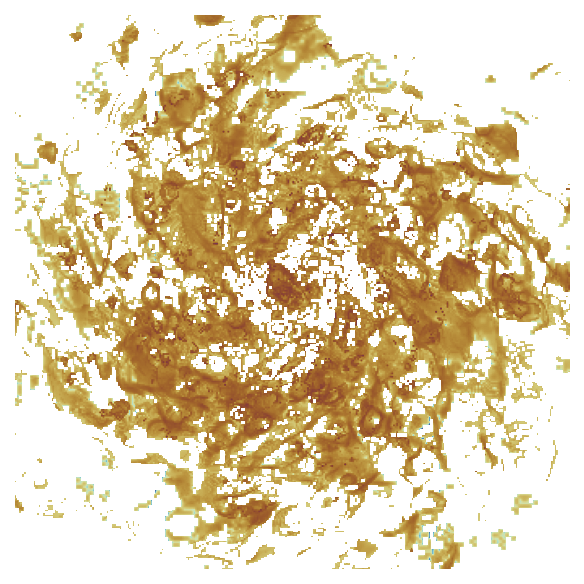

In [190]:
psd_warm = projection(gas, :sd, :Msun_pc2, mask=mask_tot, verbose=false);
imshow(log10.(psd_warm.maps[:sd])', origin="lower", cmap=cmap2 )
axis("off");
